In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import shap
import warnings


In [2]:
df = pd.read_csv("MFGEmployees4.csv")
df.columns = df.columns.str.strip()  
df.head()



,EmployeeNumber,Surname,GivenName,Gender,City,JobTitle,DepartmentName,StoreLocation,Division,Age,LengthService,AbsentHours,BusinessUnit
0,1,Gutierrez,Molly,F,Burnaby,Baker,Bakery,Burnaby,Stores,32.028816,6.018478,36.577306,Stores
1,2,Hardwick,Stephen,M,Courtenay,Baker,Bakery,Nanaimo,Stores,40.320902,5.532445,30.165072,Stores
2,3,Delgado,Chester,M,Richmond,Baker,Bakery,Richmond,Stores,48.822047,4.389973,83.807798,Stores
3,4,Simon,Irene,F,Victoria,Baker,Bakery,Victoria,Stores,44.599357,3.081736,70.020165,Stores
4,5,Delvalle,Edward,M,New Westminster,Baker,Bakery,New Westminster,Stores,35.697876,3.619091,0.000000,Stores


In [3]:
df.drop(columns=['GivenName', 'Surname'], inplace=True)
df.drop(columns=['EmployeeNumber'], inplace=True)

# Check missing values
print(df.isnull().sum())

# Drop rows with missing values
df.dropna(inplace=True)


Gender            0
City              0
JobTitle          0
DepartmentName    0
StoreLocation     0
Division          0
Age               0
LengthService     0
AbsentHours       0
BusinessUnit      0
dtype: int64


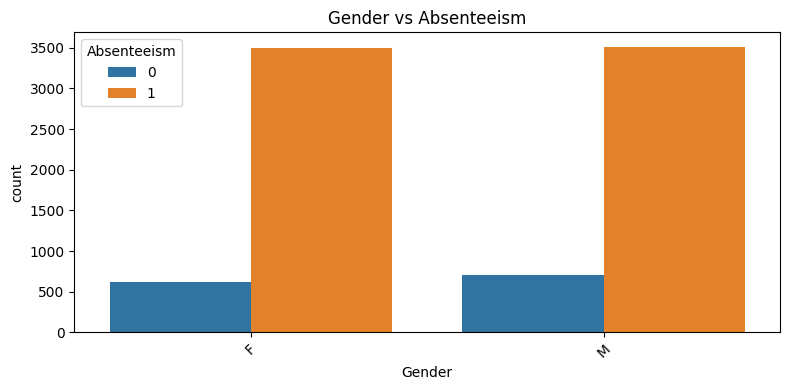

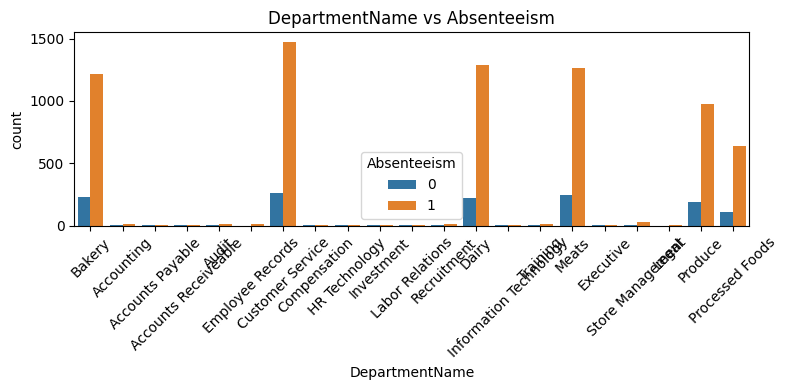

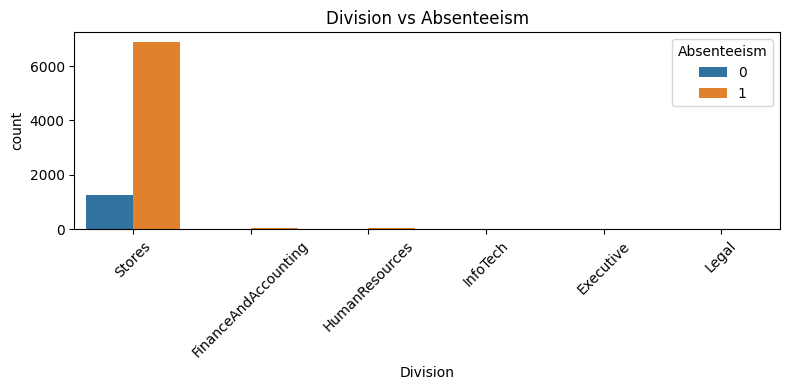

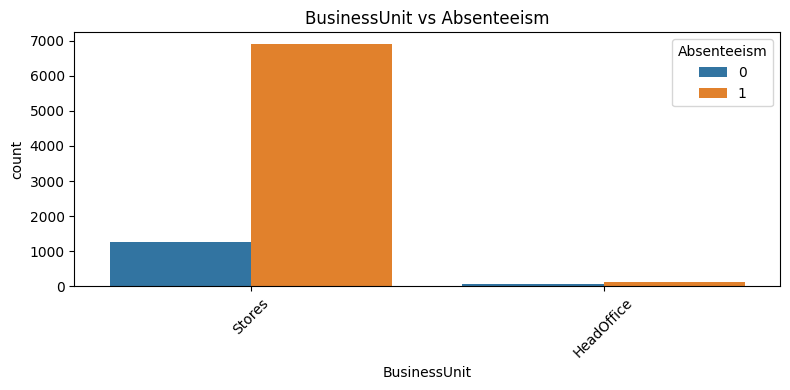

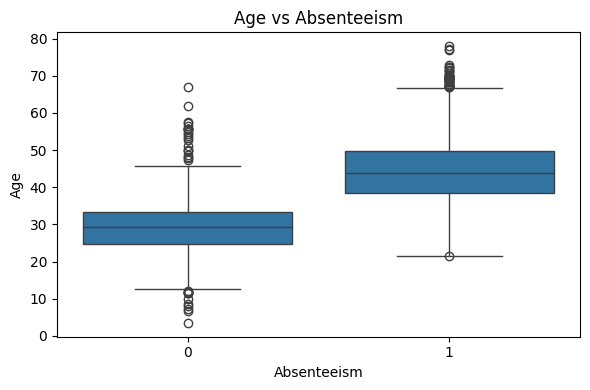

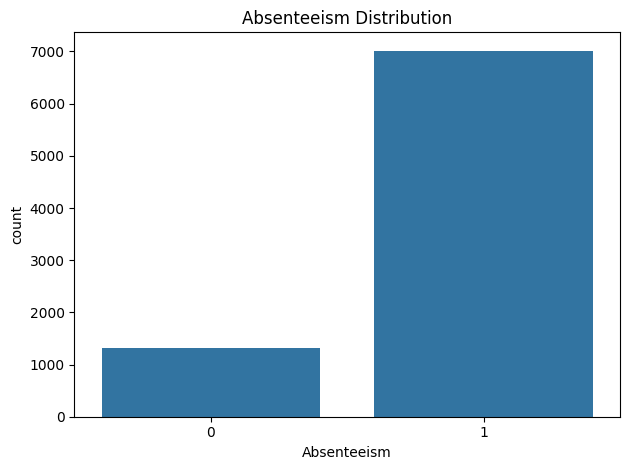

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Add Absenteeism column
df['Absenteeism'] = (df['AbsentHours'] > 0).astype(int)

# Step 2: Plot categorical features vs Absenteeism
categorical_cols = ['Gender', 'DepartmentName', 'Division', 'BusinessUnit']
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, hue='Absenteeism')
    plt.title(f'{col} vs Absenteeism')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Step 3: Age vs Absenteeism (boxplot)
plt.figure(figsize=(6, 4))
sns.boxplot(x='Absenteeism', y='Age', data=df)
plt.title("Age vs Absenteeism")
plt.tight_layout()
plt.show()

# Step 4: Absenteeism distribution
sns.countplot(x='Absenteeism', data=df)
plt.title("Absenteeism Distribution")
plt.tight_layout()
plt.show()


In [5]:
# 5. Encoding categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)
X = df_encoded.drop('Absenteeism', axis=1)
y = df_encoded['Absenteeism']


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [7]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[ 264    0]
 [   0 1404]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       264
           1       1.00      1.00      1.00      1404

    accuracy                           1.00      1668
   macro avg       1.00      1.00      1.00      1668
weighted avg       1.00      1.00      1.00      1668

